# Capstone Webscrapping using BeautifulSoup

This notebook contains scrapping data from USD to IDR exchange rate summary for 6 last month.

## A. Background

Projek ini memiliki tujuan untuk melakukan scraping terhadap nilai tukar USD ke dalam IDR. Terdapat dua kelompok data yang akan di-*scraping*, yaitu tanggal dan harga tukar USD ke Rp.  Rentang waktu yang dipilih merupakan update dari 6 bulan terakhir. terhitung sejak dilakukan penarikan data, yaitu mulai dari bulan Oktober 2022 hingga awal April 2023.  

## B. Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(soup.prettify()[:500])

<!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   USD to IDR exchange rate history
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta charset="utf-8">
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   


## C. Finding the right key to scrap the data & Extracting the right information

**Finding Key**



<img src="asset/Gambar1.PNG">




Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. 

Setelah inspect elemen, dapat terlihat bahwa tabel tersebut berada dalam `<tbody>`.

In [4]:
table = soup.find('tbody')
print(table.prettify()[1:2000])

tbody>
 <tr>
  <td>
   <a class="w" href="/exchange-rate-history/usd-idr-2023-04-11">
    April 11, 2023
   </a>
   <a class="n" href="/exchange-rate-history/usd-idr-2023-04-11">
    2023-4-11
   </a>
  </td>
  <td>
   <span class="w">
    <span class="nowrap">
     <span class="currencySymbol">
      $
     </span>
     1 =
    </span>
    <span class="nowrap">
     <span class="currencySymbol">
      Rp
     </span>
     14,915
    </span>
   </span>
   <span class="n">
    <span class="nowrap">
     <span class="currencySymbol">
      $
     </span>
     1 =
    </span>
    <span class="nowrap">
     <span class="currencySymbol">
      Rp
     </span>
     14,915
    </span>
   </span>
  </td>
 </tr>
 <tr class="odd">
  <td>
   <a class="w" href="/exchange-rate-history/usd-idr-2023-04-10">
    April 10, 2023
   </a>
   <a class="n" href="/exchange-rate-history/usd-idr-2023-04-10">
    2023-4-10
   </a>
  </td>
  <td>
   <span class="w">
    <span class="nowrap">
     <span class="cu

pemilihan key untuk waktu adalah 'a'. Waktu yang dihasilkan duplikat hanya berbeda format penulisannya saja. 

In [5]:
table.find_all('a')[:10]

[<a class="w" href="/exchange-rate-history/usd-idr-2023-04-11">April 11, 2023</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-04-11">2023-4-11</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-04-10">April 10, 2023</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-04-10">2023-4-10</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-04-07">April 7, 2023</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-04-07">2023-4-7</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-04-06">April 6, 2023</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-04-06">2023-4-6</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-04-05">April 5, 2023</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-04-05">2023-4-5</a>]

Sedangkan key untuk harga tukar USD adalah 'span'. 

In [6]:
table.find_all('span')[:10] 

[<span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>14,915</span></span>,
 <span class="nowrap"><span class="currencySymbol">$</span>1 =</span>,
 <span class="currencySymbol">$</span>,
 <span class="nowrap"><span class="currencySymbol">Rp</span>14,915</span>,
 <span class="currencySymbol">Rp</span>,
 <span class="n"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>14,915</span></span>,
 <span class="nowrap"><span class="currencySymbol">$</span>1 =</span>,
 <span class="currencySymbol">$</span>,
 <span class="nowrap"><span class="currencySymbol">Rp</span>14,915</span>,
 <span class="currencySymbol">Rp</span>]

Namun karena masih belum spesifik. maka memerlukan atribut tambahan.

In [7]:
table.find_all('span', attrs = {'class':'nowrap'})[:10]

[<span class="nowrap"><span class="currencySymbol">$</span>1 =</span>,
 <span class="nowrap"><span class="currencySymbol">Rp</span>14,915</span>,
 <span class="nowrap"><span class="currencySymbol">$</span>1 =</span>,
 <span class="nowrap"><span class="currencySymbol">Rp</span>14,915</span>,
 <span class="nowrap"><span class="currencySymbol">$</span>1 =</span>,
 <span class="nowrap"><span class="currencySymbol">Rp</span>14,950</span>,
 <span class="nowrap"><span class="currencySymbol">$</span>1 =</span>,
 <span class="nowrap"><span class="currencySymbol">Rp</span>14,950</span>,
 <span class="nowrap"><span class="currencySymbol">$</span>1 =</span>,
 <span class="nowrap"><span class="currencySymbol">Rp</span>14,941</span>]

sebenarnya, hasil dari penambahan attribut masih belum spesifik karena terdapat informasi yang tidak diperlukan ikut terpanggil. Selain itu, jika diperhatikan data juga bersifat duplikat. Hal ini akan diatasi pada proses looping.


**Finding row length**

Dalam proses looping, tentunya perlu memerhatikan panjang baris. 

In [8]:
len(table.find_all('a'))

259

untuk tanggal, panjang data memiliki nilai ganjil. sedangkan seharusnya bernilai genap. karena data bersifat duplikat. perlu dicek, apakah terdapat informasi yang tidak diperlukan ikut terpanggil lagi.

In [9]:
table.find_all('a')[len(table.find_all('a'))-1]

<a class="btn" href="/HistoryExchangeRatesReportDownload.aspx?base_iso_code=USD&amp;iso_code=IDR">Download History</a>

Yapp.. benar ternyata. terdapat informasi yang tidak dibutuhkan namun ikut terpanggil. dan ini berada di baris terakhir. sehingga kita bisa mengabaikan data tersebut dengan mengurangi satu baris dari panjang baris yang sebenarnya. Selanjutnya mari kita cek panjang baris milik data harga USD. 

In [10]:
len(table.find_all('span', attrs = {'class':'nowrap'}))

516

panjang baris dua kali dari panjang baris milik tanggal. berarti datanya sudah sesuai. sehingga kita bisa mengambil panjang baris milik data tanggal. 

In [11]:
row = table.find_all('a')
row_length = len(row)-1  #jangan lupa dikurangi satu karena informasi dari baris terakhir tidak diperlukan
row_length

258

**Scraping process**

Pada proses looping ini, pengambilan baris pada data tanggal dengan step 2. sedangkan pada data harga USD dengan step 4. Jika diperhartikan. 

loop 1 => baris 1 pada `date`, maka baris 1 pada `rupiah`. 

loop 2 => baris 3 pada `date`, maka baris 5 pada `rupiah`

loop 3 => baris 5 pada `date`, maka baris 9 pada `rupiah`

...

...

...

loop ...=> bari i pada `date`, maka baris `2*i - 1` pada `rupiah`. 


pola tersebut yang akan digunakan untuk proses looping.

In [12]:
temp = [] #initiating a tuple

for i in range(1, row_length, 2):
    #tanggal
    date = table.find_all('a')[i].text
    #print(date)
    
    #harga USD dalam rupiah
    rupiah = table.find_all('span', attrs = {'class':'nowrap'})[2*i-1].text
    #print(rupiah)
    temp.append((date,rupiah))

    
    
temp 

[('2023-4-11', 'Rp14,915'),
 ('2023-4-10', 'Rp14,950'),
 ('2023-4-7', 'Rp14,941'),
 ('2023-4-6', 'Rp14,931'),
 ('2023-4-5', 'Rp14,960'),
 ('2023-4-4', 'Rp14,957'),
 ('2023-4-3', 'Rp14,922'),
 ('2023-3-31', 'Rp14,969'),
 ('2023-3-30', 'Rp15,024'),
 ('2023-3-29', 'Rp15,034'),
 ('2023-3-28', 'Rp15,060'),
 ('2023-3-27', 'Rp15,107'),
 ('2023-3-24', 'Rp15,165'),
 ('2023-3-23', 'Rp15,085'),
 ('2023-3-22', 'Rp15,253'),
 ('2023-3-21', 'Rp15,301'),
 ('2023-3-20', 'Rp15,343'),
 ('2023-3-17', 'Rp15,375'),
 ('2023-3-16', 'Rp15,429'),
 ('2023-3-15', 'Rp15,459'),
 ('2023-3-14', 'Rp15,380'),
 ('2023-3-13', 'Rp15,416'),
 ('2023-3-10', 'Rp15,503'),
 ('2023-3-9', 'Rp15,495'),
 ('2023-3-8', 'Rp15,449'),
 ('2023-3-7', 'Rp15,429'),
 ('2023-3-6', 'Rp15,354'),
 ('2023-3-3', 'Rp15,278'),
 ('2023-3-2', 'Rp15,322'),
 ('2023-3-1', 'Rp15,249'),
 ('2023-2-28', 'Rp15,241'),
 ('2023-2-27', 'Rp15,216'),
 ('2023-2-24', 'Rp15,265'),
 ('2023-2-23', 'Rp15,211'),
 ('2023-2-22', 'Rp15,197'),
 ('2023-2-21', 'Rp15,235'),
 ('2

Karena informasi tanggal yang diperoleh terbalik. maka perlu direverse. 

In [13]:
temp = temp[::-1]

In [14]:
temp

[('2022-10-13', 'Rp15,372'),
 ('2022-10-14', 'Rp15,472'),
 ('2022-10-17', 'Rp15,441'),
 ('2022-10-18', 'Rp15,474'),
 ('2022-10-19', 'Rp15,587'),
 ('2022-10-20', 'Rp15,562'),
 ('2022-10-21', 'Rp15,537'),
 ('2022-10-24', 'Rp15,598'),
 ('2022-10-25', 'Rp15,533'),
 ('2022-10-26', 'Rp15,503'),
 ('2022-10-27', 'Rp15,560'),
 ('2022-10-28', 'Rp15,557'),
 ('2022-10-31', 'Rp15,624'),
 ('2022-11-1', 'Rp15,674'),
 ('2022-11-2', 'Rp15,685'),
 ('2022-11-3', 'Rp15,790'),
 ('2022-11-4', 'Rp15,615'),
 ('2022-11-7', 'Rp15,685'),
 ('2022-11-8', 'Rp15,638'),
 ('2022-11-9', 'Rp15,692'),
 ('2022-11-10', 'Rp15,520'),
 ('2022-11-11', 'Rp15,474'),
 ('2022-11-14', 'Rp15,554'),
 ('2022-11-15', 'Rp15,557'),
 ('2022-11-16', 'Rp15,639'),
 ('2022-11-17', 'Rp15,714'),
 ('2022-11-18', 'Rp15,641'),
 ('2022-11-21', 'Rp15,741'),
 ('2022-11-22', 'Rp15,664'),
 ('2022-11-23', 'Rp15,626'),
 ('2022-11-24', 'Rp15,647'),
 ('2022-11-25', 'Rp15,693'),
 ('2022-11-28', 'Rp15,743'),
 ('2022-11-29', 'Rp15,734'),
 ('2022-11-30', 'Rp15

## D. Creating data frame & Data wrangling

**CREATING DATA FRAME**

Data hasil scraping masih dalam bentuk array, sehingga perlu menyimpannya dalam bentuk data frame agar mudah untuk dianalisis.

In [15]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('date','rupiah'))
df.head()

,date,rupiah
0,2022-10-13,"Rp15,372"
1,2022-10-14,"Rp15,472"
2,2022-10-17,"Rp15,441"
3,2022-10-18,"Rp15,474"
4,2022-10-19,"Rp15,587"


**DATA WRANGLING** 

In [16]:
df.dtypes

date      object
rupiah    object
dtype: object

Tipe data yang tertera belum sesuai dengan yang seharusnya. oleh karenanya perlu diubah, dimana kolom `date` berupa tipe `datetime64`. Sedangkan kolom `rupiah` berupa `float64`. Namun, sebelum mengubah tipe data pada kolom `rupiah`, perlu menghilangkan beberapa karakter yang ada, yaitu huruf **Rp** dan tanda baca koma **(,)**. 

In [17]:
df['date']=df['date'].astype('datetime64')
df['rupiah']=df['rupiah'].str.lstrip('Rp').str.replace(',','')
df['rupiah']=df['rupiah'].astype('float64')


In [18]:
df

,date,rupiah
0,2022-10-13,15372.0
1,2022-10-14,15472.0
2,2022-10-17,15441.0
3,2022-10-18,15474.0
4,2022-10-19,15587.0
...,...,...
124,2023-04-05,14960.0
125,2023-04-06,14931.0
126,2023-04-07,14941.0
127,2023-04-10,14950.0


Karena akan dilakukan visualisasi data. maka perlu mengatur index dari data frame yang telah dibuat.

In [19]:
df=df.set_index('date')

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## E. Finishing This Notebook with Your Analysis and Conclusion

**making the data visualisation**

<AxesSubplot:title={'center':'USD to IDR Daily'}, xlabel='date', ylabel='Price in IDR'>

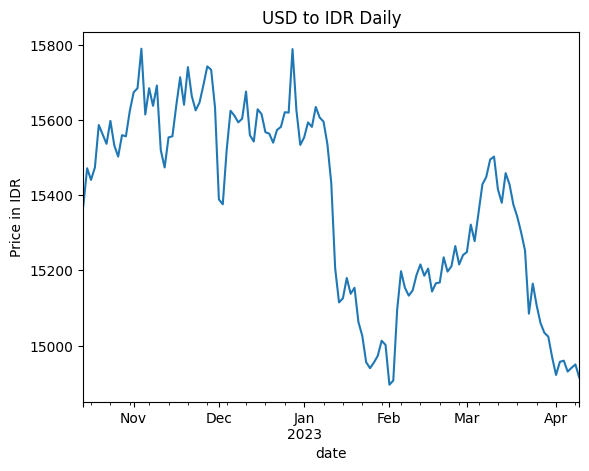

In [27]:
df.plot(legend = False,
       ylabel = 'Price in IDR',
       title = 'USD to IDR Daily'
       )

**Conclusion**

Berdasarkan plot data yang telah dibuat dapat ditarik beberapa kesimpulan, diantaranya.
1. Selama 6 bulan terakhir. Dolar berada dalam rentang sekitar Rp14.900 hingga Rp15.800.
2. Dolar mengalami uptrend pada periode Februari-Maret dan mengalami downtrend pada periode Januari-Februari dan Maret-April. Sedangkan pada periode November-Januari mengalami sideways.
3. Harga dollar terendah terjadi pada awal bulan Februari selama 6 bulan terakhir ini.
4. Harga dollar tertinggi terjadi pada awal bulan November 2022 dan Januari 2023 dalam rentang 6 bulan terakhir. 

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.